In [1]:
%config Completer.use_jedi = False

# visualisation tools

In [34]:
#Visualisation functions used


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D


#plt.style.use("seaborn")



def velocity_animation(X, Y, u_list, v_list, frame_interval, filename):
    """Function that
    output:
    generates a 2d vector field from  a lists of 2D arrays
    inputs:
    meshgrid of list of boundry points x and y
    u_list, v_list and creates an quiver animation of the velocity field (u, v). 
    it takes a time interval for the time between 2 frames changing(frame interval)
    the number of time steps between each eta in eta_list and finally, a filename for video."""
    
    
    fig, ax = plt.subplots(figsize = (8, 10), facecolor = "white")
    plt.title("Velocity field $\mathbf{u}(x,y)$ after 0.0 days", fontname = "serif", fontsize = 19,color='white')
    plt.xlabel("x [km]", fontname = "serif", fontsize = 16)
    plt.ylabel("y [km]", fontname = "serif", fontsize = 16)
    q_int = 3
    Q = ax.quiver(X[::q_int, ::q_int]/1000.0, Y[::q_int, ::q_int]/1000.0, u_list[0][::q_int,::q_int], v_list[0][::q_int,::q_int],
        scale=0.2, scale_units='inches',color="blue")
    # quiver is used to create arrow heads
    # it takes( X,Y,U,V) WHERE
   # X, Y : These parameter are the x and y coordinates of the arrow locations.
    #U, V: These parameter are the x and y components of the arrow vector.

    #qk = plt.quiverkey(Q, 0.9, 0.9, 0.001, "0.1 m/s", labelpos = "E", coordinates = "figure")

    # Update function for quiver animation.
    # we update the values of u and v, magnitude of arrows in x and y dirction
    def update_quiver(num):
        u = u_list[num]
        v = v_list[num]
        ax.set_title("Velocity field $\mathbf{{u}}(x,y,t)$ after t = {:.2f} hours".format(
            num*frame_interval/3600), fontname = "serif", fontsize = 19)
        Q.set_UVC(u[::q_int, ::q_int], v[::q_int, ::q_int])
        return Q,

    anim = animation.FuncAnimation(fig, update_quiver,
        frames = len(u_list), interval = 10, blit = False)
    """
     frames: number of times each of the arrows change
     interval: length of video
     
    """
    mpeg_writer = animation.FFMpegWriter(fps = 24, bitrate = 10000,
        codec = "libx264", extra_args = ["-pix_fmt", "yuv420p"])
    fig.tight_layout()
    """
    # bitrate:The bitrate of the movie, in kilobits per second. Higher values means higher quality movies, but increase the file size.
    #fps: Movie frame rate (per second).
    #codec and extra args are used for encription
    """
    anim.save("{}.mp4".format(filename), writer = mpeg_writer)
    return anim    # Need to return anim object to see the animation



def eta_animation3D(X, Y, eta_list, frame_interval, filename):
    """Function that
    output:
    generates a 3d animation of eta equation from a lists of 2D arrays
    inputs:
    meshgrid of list of boundry points x and y
    eta list which contains values of height of all points for all instances of time 
    it takes a time interval for the time between 2 frames changing(frame interval)
    a filename for video."""
    
    
    fig = plt.figure(figsize = (8, 8), facecolor = "white")
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(X, Y, eta_list[0], cmap = plt.cm.RdBu_r)

    def update_surf(num):
        ax.clear()
        surf = ax.plot_surface(X/1000, Y/1000, eta_list[num], cmap = plt.cm.RdBu_r)
        ax.set_title("Surface elevation $\eta(x,y,t)$ after $t={:.2f}$ hours".format(
            num*frame_interval/3600), fontname = "serif", fontsize = 19, y=1.04)
        ax.set_xlabel("x [km]", fontname = "serif", fontsize = 14)
        ax.set_ylabel("y [km]", fontname = "serif", fontsize = 14)
        ax.set_zlabel("$\eta$ [m]", fontname = "serif", fontsize = 16)
        ax.set_xlim(X.min()/1000, X.max()/1000)
        ax.set_ylim(Y.min()/1000, Y.max()/1000)
        ax.set_zlim(-0.3, 0.7)
        plt.tight_layout()
        return surf,

    anim = animation.FuncAnimation(fig, update_surf,
        frames = len(eta_list), interval = 10, blit = False)
    
    mpeg_writer = animation.FFMpegWriter(fps = 24, bitrate = 10000,
        codec = "libx264", extra_args = ["-pix_fmt", "yuv420p"])
    anim.save("{}.mp4".format(filename), writer = mpeg_writer)
    return anim    # Need to return anim object to see the animation




# setting parameters

In [40]:
# swe 
#original

"""
Shallow water equations we are using:

    du/dt - fv = -g*d(eta)/dx + tau_x/(rho_0*H)- kappa*u
    dv/dt + fu = -g*d(eta)/dy + tau_y/(rho_0*H)- kappa*v
    d(eta)/dt + d((eta + H)*u)/dx + d((eta + H)*u)/dy = sigma - w ( ETA EQUATION )
    
    from wikipedia:
    here:wiki
    kappa=b
    eta=h( ETA IS HEIGHT OF WAVE)
    eta is an extra paramenter taken by us
    {\displaystyle {\begin{aligned}{\frac {\partial h}{\partial t}}&+H\left({\frac {\partial u}{\partial x}}+{\frac {\partial v}{\partial y}}\right)=0,\\[3pt]{\frac {\partial u}{\partial t}}&-fv=-g{\frac {\partial h}{\partial x}}-bu,\\[3pt]{\frac {\partial v}{\partial t}}&+fu=-g{\frac {\partial h}{\partial y}}-bv.\end{aligned}}}

where f = f_0 + beta*y can be the full latitude varying coriolis parameter.




CFL Functions:( USED FOR GETTING dt)

The Courant–Friedrichs–Lewy or CFL condition is a condition for the stability of unstable numerical methods
that model convection or wave phenomena. As such, 
it plays an important role in CFD (computational fluid dynamics).


The model is stable under the CFL condition of

    dt <= min(dx, dy)/sqrt(g*H)    and    alpha << 1 (if coriolis is used)



where dx, dy is the grid spacing in the x- and y-direction respectively, g is
the acceleration of gravity and H is the resting depth of the fluid."""

import time
import numpy as np
import matplotlib.pyplot as plt
# import viz_tools

# ******************** Parameters****************

# --------------- Physical prameters ---------------
L_x = 1E+6              # Length of domain in x-direction
L_y = 1E+6              # Length of domain in y-direction
g = 9.81                 # Acceleration of gravity [m/s^2]
H = 100                 # Depth of fluid [m]
f_0 = 1E-4              # Fixed part ofcoriolis parameter [1/s]
beta = 2E-11            # gradient of coriolis parameter [1/ms]
rho_0 = 1024.0          # Density of fluid [kg/m^3]
tau_0 = 0.1             # Amplitude of wind stress [kg/ms^2]
use_coriolis = True     # True if you want coriolis force
use_friction = True    # True if you want bottom friction
use_wind = False        # True if you want wind stress
use_beta = True         # True if you want variation in coriolis
use_source = False       # True if you want mass source into the domain
use_sink = False       # True if you want mass sink out of the domain
param_string = "\n================================================================"
param_string += "\nuse_coriolis = {}\nuse_beta = {}".format(use_coriolis, use_beta)
param_string += "\nuse_friction = {}\nuse_wind = {}".format(use_friction, use_wind)
param_string += "\nuse_source = {}\nuse_sink = {}".format(use_source, use_sink)
param_string += "\ng = {}\nH = {}".format(g, H)

#print(param_string)

# --------------- Computational prameters ---------------
N_x = 150                            # Number of gri points in x-direction
N_y = 150                           # Number of grid points in y-direction
dx = L_x/(N_x - 1)                   # Grid spacing in x-direction
dy = L_y/(N_y - 1)                   # Grid spacing in y-direction

dt = 0.1*min(dx, dy)/np.sqrt(g*H)    # Time step (defined from the CFL condition)

time_step = 1                        # For counting time loop steps
max_time_step = 5000                 # Total number of time steps in simulation( loop )
# the loop will run 5000 times
x = np.linspace(-L_x/2, L_x/2, N_x)  # Array with x-points( form -xboundry to +x bounry with equal distrubtion)
y = np.linspace(-L_y/2, L_y/2, N_y)  # Array with y-points
X, Y = np.meshgrid(x, y)             # Meshgrid for plotting
# meshgrid function https://www.geeksforgeeks.org/numpy-meshgrid-function/
# print(X)
# print("*****")
# print(Y)
# print("*****")
X = np.transpose(X)                  # To get plots right
# print(X)
# print("*****")
Y = np.transpose(Y)                  # To get plots right
# print(Y)
# print("*****")
# by transposing we are essentially exchanging x and y
param_string += "\ndx = {:.2f} km\ndy = {:.2f} km\ndt = {:.2f} s".format(dx, dy, dt)
# print(L_x)
# print(L_y)
# print(dt)
# print(x)






# writing into parameters file

In [41]:
# Write all parameters out to file.
with open("param_output.txt", "w") as output_file:
    output_file.write(param_string)

# print(param_string)     # Also print parameters to screen

print("Intialising all values done")



Intialising all values done


# initialising arrays for computation


In [42]:
# *******Allocating arrays and initial conditions ********

u_n = np.zeros((N_x, N_y))      # To hold u at current time step
u_np1 = np.zeros((N_x, N_y))    # To hold u at next time step
v_n = np.zeros((N_x, N_y))      # To hold v at current time step
v_np1 = np.zeros((N_x, N_y))    # To hold v at enxt time step
eta_n = np.zeros((N_x, N_y))    # To hold eta at current time step
eta_np1 = np.zeros((N_x, N_y))  # To hold eta at next time step



# # Temporary variables (each time step) for upwind scheme in eta equation
h_e = np.zeros((N_x, N_y))
h_w = np.zeros((N_x, N_y))
h_n = np.zeros((N_x, N_y))
h_s = np.zeros((N_x, N_y))
uhwe = np.zeros((N_x, N_y))
vhns = np.zeros((N_x, N_y))
# print(u_n)
# print(v_n)



# Initial condition for eta.

eta_n = np.exp(-((X-L_x/2.7)**2/(2*(0.05E+6)**2) + (Y-L_y/4)**2/(2*(0.05E+6)**2)))


#viz_tools.surface_plot3D(X, Y, eta_n, (X.min(), X.max()), (Y.min(), Y.max()), (eta_n.min(), eta_n.max()))

# Sampling variables.
eta_list = list(); u_list = list(); v_list = list()         # Lists to contain eta and u,v for animation

anim_interval = 20                                         # How often to sample for time series

# =============== Done with setting up arrays and initial conditions ===============

t_0 = time.perf_counter()  # For timing the computation loop
# to get instantanious value of time
# print(t_0)



# main execution code

In [43]:
# # ==================================================================================
# # ========================= Main time loop for simulation ==========================
# # ==================================================================================
 # ------------ Computing values for u and v at next time step --------------
# print(u_np1)
# print("***")
# print(v_np1)
# print("****")
u_np1[:-1, :] = u_n[:-1, :] - g*dt/dx*(eta_n[1:, :] - eta_n[:-1, :])
# for u_np we use n-1 rows
v_np1[:, :-1] = v_n[:, :-1] - g*dt/dy*(eta_n[:, 1:] - eta_n[:, :-1])
# for v_np we use n-1 columns

    

u_np1[-1, :] = 0.0      # Eastern boundary condition( the last row is row completly )
v_np1[:, -1] = 0.0      # Northern boundary condition( the whole of right most colum is 0)
# print(u_np1)
# print("***")
# print(v_np1)

while (time_step < max_time_step):
    
    # ------------ Computing values for u and v at next time step --------------
    u_np1[:-1, :] = u_n[:-1, :] - g*dt/dx*(eta_n[1:, :] - eta_n[:-1, :])
    v_np1[:, :-1] = v_n[:, :-1] - g*dt/dy*(eta_n[:, 1:] - eta_n[:, :-1])

    
    v_np1[:, -1] = 0.0      # Northern boundary condition
    u_np1[-1, :] = 0.0      # Eastern boundary condition
    # -------------------------- Done with u and v -----------------------------
    
    

    # --- Computing arrays needed for the upwind scheme in the eta equation.----
    # to solve partial order equation( ETA equation)
    
    
#     In computational physics, upwind schemes denote a class of numerical 
#     discretization methods for solving hyperbolic partial differential equations.

#a hyperbolic partial differential equation of order n is a partial differential equation that, 
# roughly speaking, has a well-posed initial value problem for the first n-1 derivatives


    h_e[:-1, :] = np.where(u_np1[:-1, :] > 0, eta_n[:-1, :] + H, eta_n[1:, :] + H)
    h_e[-1, :] = eta_n[-1, :] + H

    h_w[0, :] = eta_n[0, :] + H
    h_w[1:, :] = np.where(u_np1[:-1, :] > 0, eta_n[:-1, :] + H, eta_n[1:, :] + H)

    h_n[:, :-1] = np.where(v_np1[:, :-1] > 0, eta_n[:, :-1] + H, eta_n[:, 1:] + H)
    h_n[:, -1] = eta_n[:, -1] + H

    h_s[:, 0] = eta_n[:, 0] + H
    h_s[:, 1:] = np.where(v_np1[:, :-1] > 0, eta_n[:, :-1] + H, eta_n[:, 1:] + H)

    uhwe[0, :] = u_np1[0, :]*h_e[0, :]
    uhwe[1:, :] = u_np1[1:, :]*h_e[1:, :] - u_np1[:-1, :]*h_w[1:, :]

    vhns[:, 0] = v_np1[:, 0]*h_n[:, 0]
    vhns[:, 1:] = v_np1[:, 1:]*h_n[:, 1:] - v_np1[:, :-1]*h_s[:, 1:]
    
#     # ------------------------- Upwind computations done -------------------------

#     # ----------------- Computing eta values at next time step -------------------
    eta_np1[:, :] = eta_n[:, :] - dt*(uhwe[:, :]/dx + vhns[:, :]/dy)  


#     # ----------------------------- Done with eta --------------------------------

    u_n = np.copy(u_np1)        # Update u for next iteration
    v_n = np.copy(v_np1)        # Update v for next iteration
    eta_n = np.copy(eta_np1)    # Update eta for next iteration

    time_step += 1

    
    # Store eta and (u, v) every anin_interval time step for animations.
    if (time_step % anim_interval == 0):
#         print("Time: \t{:.2f} hours".format(time_step*dt/3600))
#         print("Step: \t{} / {}".format(time_step, max_time_step))
#         print("Mass: \t{}\n".format(np.sum(eta_n)))
        u_list.append(u_n)
        v_list.append(v_n)
        eta_list.append(eta_n)





# visualisation of vector field


Visualizing results...

Visualization done


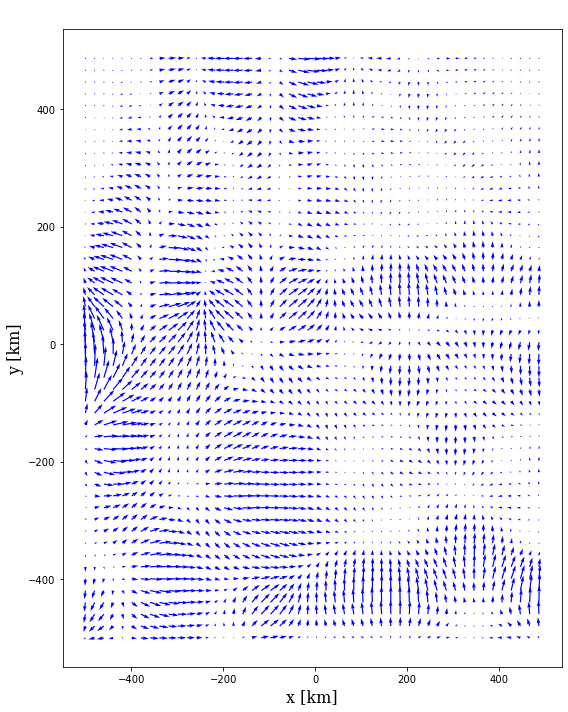

In [44]:
# ============================= Main time loop done ================================
#print("Main computation loop done!\nExecution time: {:.2f} s".format(time.perf_counter() - t_0))
print("\nVisualizing results...")



# visualising results
# VISUALISATION OF 2D VECTOR FIELD


# WE DO NOT USE ETA here as ETA is height, and we dont need height to plot a 2d vector field


my_cooment_quiv_anim =velocity_animation(X, Y, u_list, v_list, anim_interval*dt, "velocity")
# ============================ Done with visualization =============================

print("\nVisualization done")
plt.show()


# visualisation of 3d wave animation


Visualizing results...

Visualization done


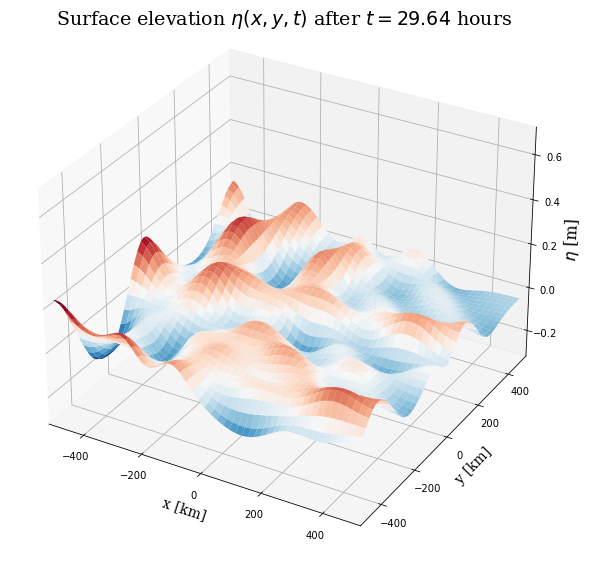

In [45]:
# ============================= Main time loop done ================================
#print("Main computation loop done!\nExecution time: {:.2f} s".format(time.perf_counter() - t_0))
print("\nVisualizing results...")





eta_surf_anim = eta_animation3D(X, Y, eta_list, anim_interval*dt, "eta_surface")# for 3d waves

# ============================ Done with visualization =============================

print("\nVisualization done")
plt.show()

# time analysis

here are the results of the time analyis:

for various steps:( for current parameters)
* visualisation tools: 74 ms
* setting parameters: 56 ms
* initialising arrays: 68 ms
* main execution code : 11.1 s
* visualisation of vector field: 40 ms
* visualisation of 3d wave:2min 53 sec


for various steps:( for N_x = 200,N_y = 200   )
( grid points in x and y dir)
     
* visualisation tools: 70 ms
* setting parameters: 56 ms
* initialising arrays: 95 ms
* main execution code : 17.1 s
* visualisation of vector field: 1min 53 sec ms
* visualisation of 3d wave:2min 53 sec

